<a href="https://colab.research.google.com/github/azkalltlhn/Diabetes-Classification-SVM-XGBoost/blob/main/Klasifikasi_Penyakit_Diabetes_Menggunakan_Metode_Support_Vector_Machine_(SVM)_dan_Extreme_Gradient_Boosting_(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle

!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

!unzip diabetes-prediction-dataset.zip

Mounted at /content/drive
cp: cannot stat '/content/drive/My Drive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 112MB/s]
Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


# **Data Understanding**

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
print(df.head(10))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0            

In [ ]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [ ]:
print(df.shape)

(100000, 9)


In [ ]:
print(df.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


# **Data Preparation**

In [ ]:
print(df.duplicated().sum())

3854


In [ ]:
df = df.drop_duplicates()
print("______Removed Duplicate______")
print(df.duplicated().sum())

______Removed Duplicate______
0


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# **Exploratory Data Analysis (EDA)**

Original class distribution:
diabetes
0    87664
1     8482
Name: count, dtype: int64


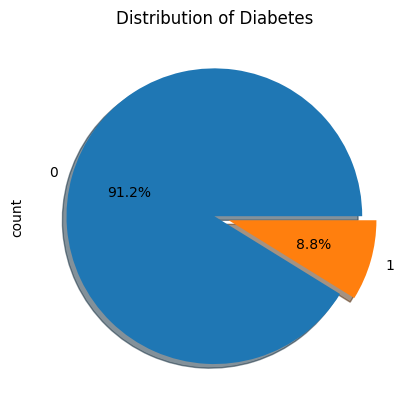

In [ ]:
import matplotlib.pyplot as plt

# Check the original class distribution
print("Original class distribution:")
print(df["diabetes"].value_counts())

# Plot the distribution of diabetes
df.diabetes.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0, 0.1], shadow=True)
plt.title('Distribution of Diabetes')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

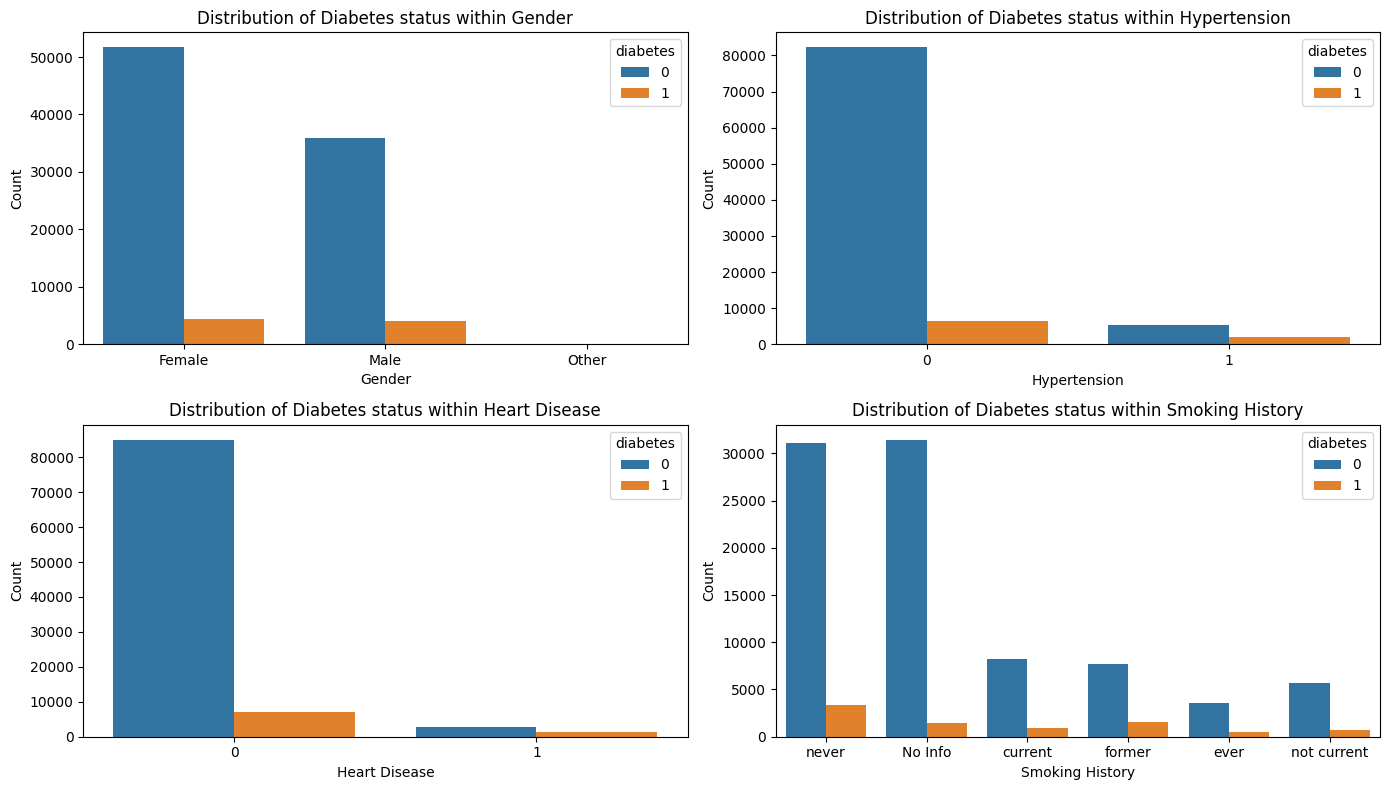

In [ ]:
# ploting categorical features alongiside target feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# Chart 1: Distribution of gender
sns.countplot(x="gender", data=df,hue = 'diabetes',ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Diabetes status within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

# Chart 2: Distribution of a
sns.countplot(x="hypertension", data=df, hue = 'diabetes', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Diabetes status within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

# Chart 3: Distribution of heart disease
sns.countplot(x="heart_disease", hue = 'diabetes',data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Diabetes status within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Count")

# Chart 4: Distribution of smoking history
sns.countplot(x="smoking_history", data=df, hue = 'diabetes', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Diabetes status within Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Minimum age: 0.08
Maximum age: 80.0
Average age: 41.79432571297817
Diabetes Counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


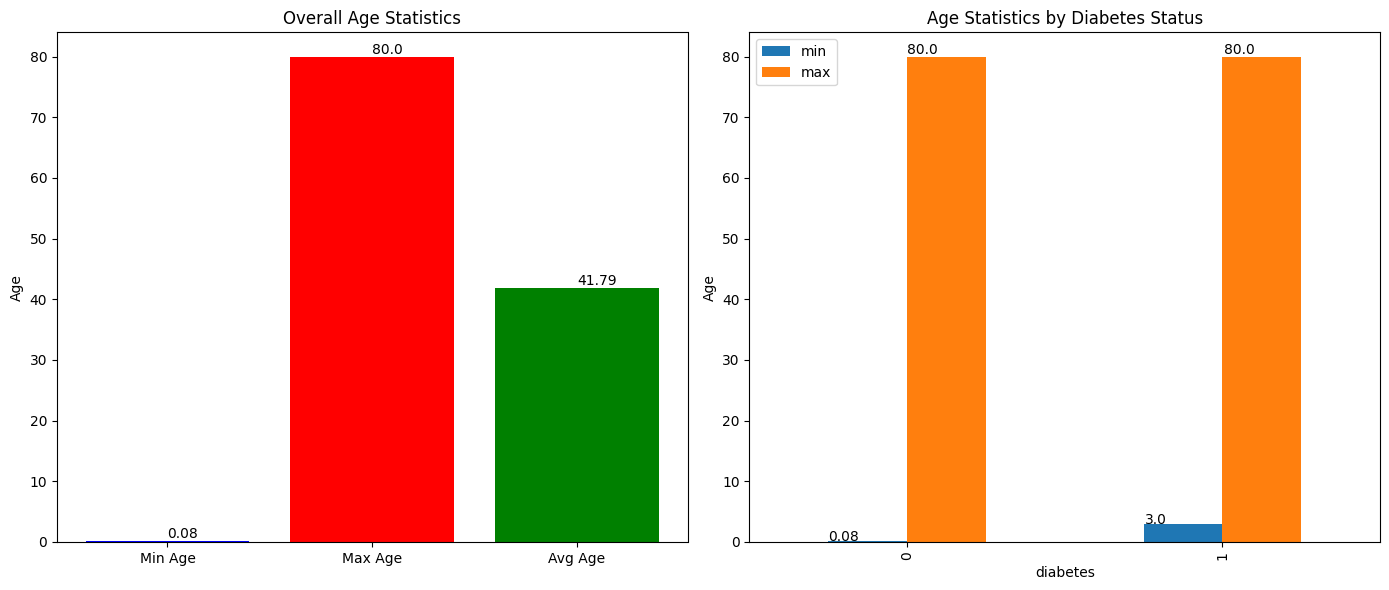

In [ ]:
# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("Diabetes Counts:")
print(diabetes_counts)
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Add text to the top of the bars

# Plot for min and max ages grouped by diabetes status
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

# Annotate bars with their values
for p in grouped_bars.patches:
    grouped_bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()

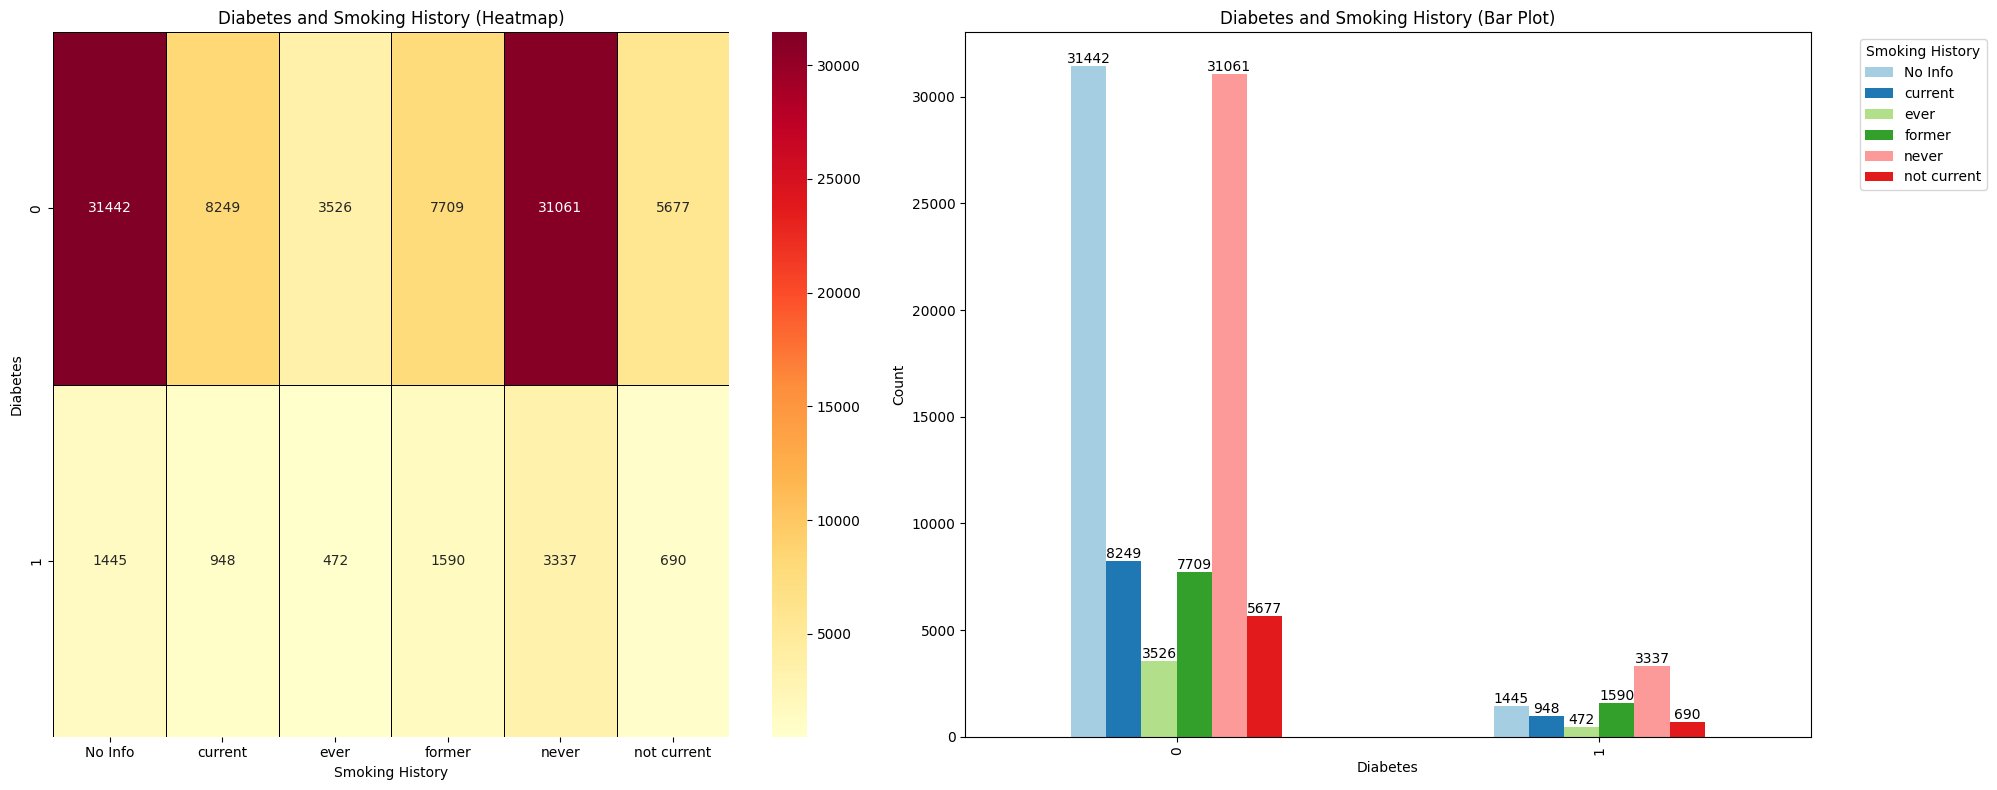

In [ ]:
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the cross table as a heatmap
sns.heatmap(cross_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

# Plotting the cross table with separate bars for smoking history
cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with their values
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()

# **Preprocessing Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical data
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [ ]:
# Downsample the majority class (Outcome = 0) to 8200
class_0 = df[df["diabetes"] == 0].sample(8200, random_state=42)

# Downsample the minority class (Outcome = 1) to 8200
class_1 = df[df["diabetes"] == 1].sample(8200, random_state=42)

# Concatenate the balanced classes
balanced_data = pd.concat([class_0, class_1])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Check the balanced class distribution
print("Balanced class distribution:")
print(balanced_data["diabetes"].value_counts())

Balanced class distribution:
diabetes
1    8200
0    8200
Name: count, dtype: int64


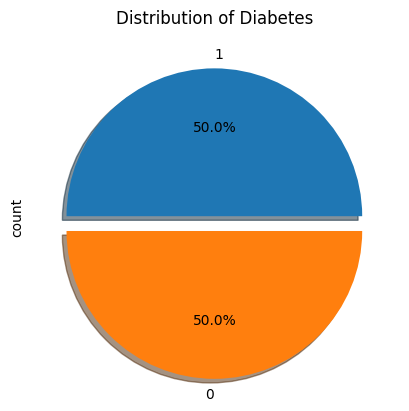

In [ ]:
# Update the original data with the balanced one
df = balanced_data.copy()

# Plot the balanced distribution of diabetes
df.diabetes.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0, 0.1], shadow=True)
plt.title('Distribution of Diabetes')
plt.show()

In [ ]:
# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Pembentukan Algoritma SVM dan XGBOOST**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb

# Splitting the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Initializing and training the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# **Uji Performa Model**

SVM Test Accuracy: 0.8912
SVM Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1643
           1       0.89      0.90      0.89      1637

    accuracy                           0.89      3280
   macro avg       0.89      0.89      0.89      3280
weighted avg       0.89      0.89      0.89      3280



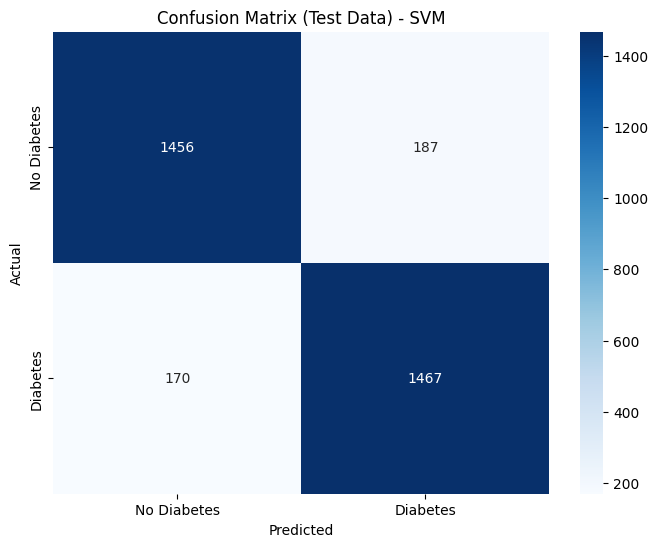

XGBoost Test Accuracy: 0.9037
XGBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1643
           1       0.90      0.91      0.90      1637

    accuracy                           0.90      3280
   macro avg       0.90      0.90      0.90      3280
weighted avg       0.90      0.90      0.90      3280



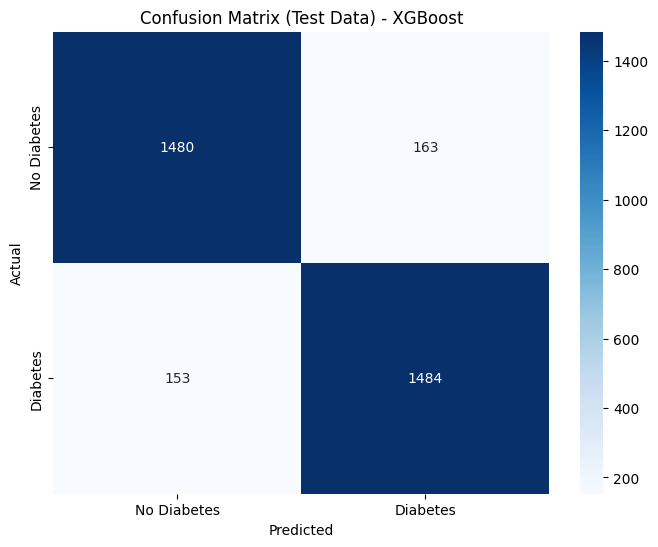

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Making predictions on test data for SVM
y_pred_test_svm = svm_model.predict(X_test)

# Evaluating the SVM model on test data
accuracy_svm_test = accuracy_score(y_test, y_pred_test_svm)
print(f'SVM Test Accuracy: {accuracy_svm_test:.4f}')
print(f'SVM Test Classification Report:\n{classification_report(y_test, y_pred_test_svm)}')

# Compute the confusion matrix for test data (SVM)
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)

# Plotting the confusion matrix for test data (SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Test Data) - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Making predictions on test data for XGBoost
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluating the XGBoost model on test data
accuracy_xgb_test = accuracy_score(y_test, y_pred_test_xgb)
print(f'XGBoost Test Accuracy: {accuracy_xgb_test:.4f}')
print(f'XGBoost Test Classification Report:\n{classification_report(y_test, y_pred_test_xgb)}')

# Compute the confusion matrix for test data (XGBoost)
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Plotting the confusion matrix for test data (XGBoost)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Test Data) - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Training Accuracy: 0.8995
SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6557
           1       0.89      0.91      0.90      6563

    accuracy                           0.90     13120
   macro avg       0.90      0.90      0.90     13120
weighted avg       0.90      0.90      0.90     13120



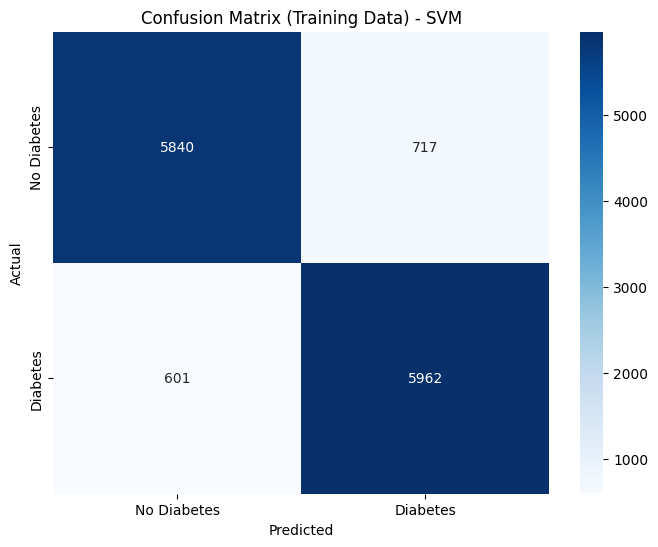

XGBoost Training Accuracy: 0.9581
XGBoost Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6557
           1       0.96      0.96      0.96      6563

    accuracy                           0.96     13120
   macro avg       0.96      0.96      0.96     13120
weighted avg       0.96      0.96      0.96     13120



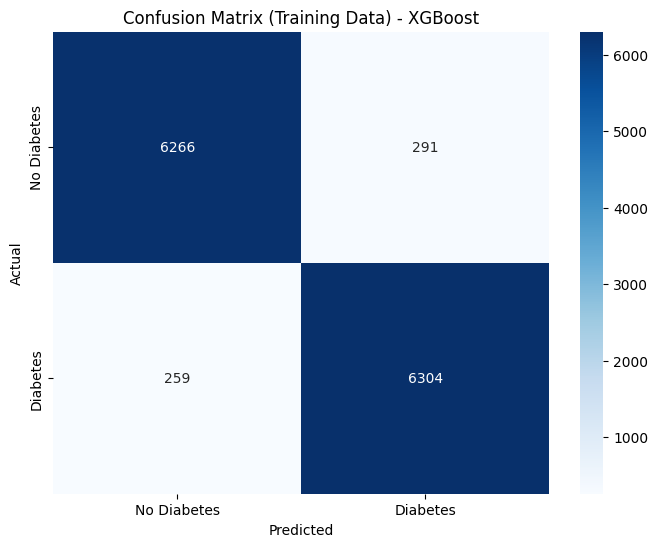

In [ ]:
# Evaluating the model on training data for SVM
y_pred_train_svm = svm_model.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_train_svm)
print(f'SVM Training Accuracy: {accuracy_svm_train:.4f}')
print(f'SVM Training Classification Report:\n{classification_report(y_train, y_pred_train_svm)}')

# Compute the confusion matrix for training data (SVM)
conf_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)

# Plotting the confusion matrix for training data (SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Training Data) - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluating the model on training data for XGBoost
y_pred_train_xgb = xgb_model.predict(X_train)
accuracy_xgb_train = accuracy_score(y_train, y_pred_train_xgb)
print(f'XGBoost Training Accuracy: {accuracy_xgb_train:.4f}')
print(f'XGBoost Training Classification Report:\n{classification_report(y_train, y_pred_train_xgb)}')

# Compute the confusion matrix for training data (XGBoost)
conf_matrix_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)

# Plotting the confusion matrix for training data (XGBoost)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (Training Data) - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Model Terbaik**

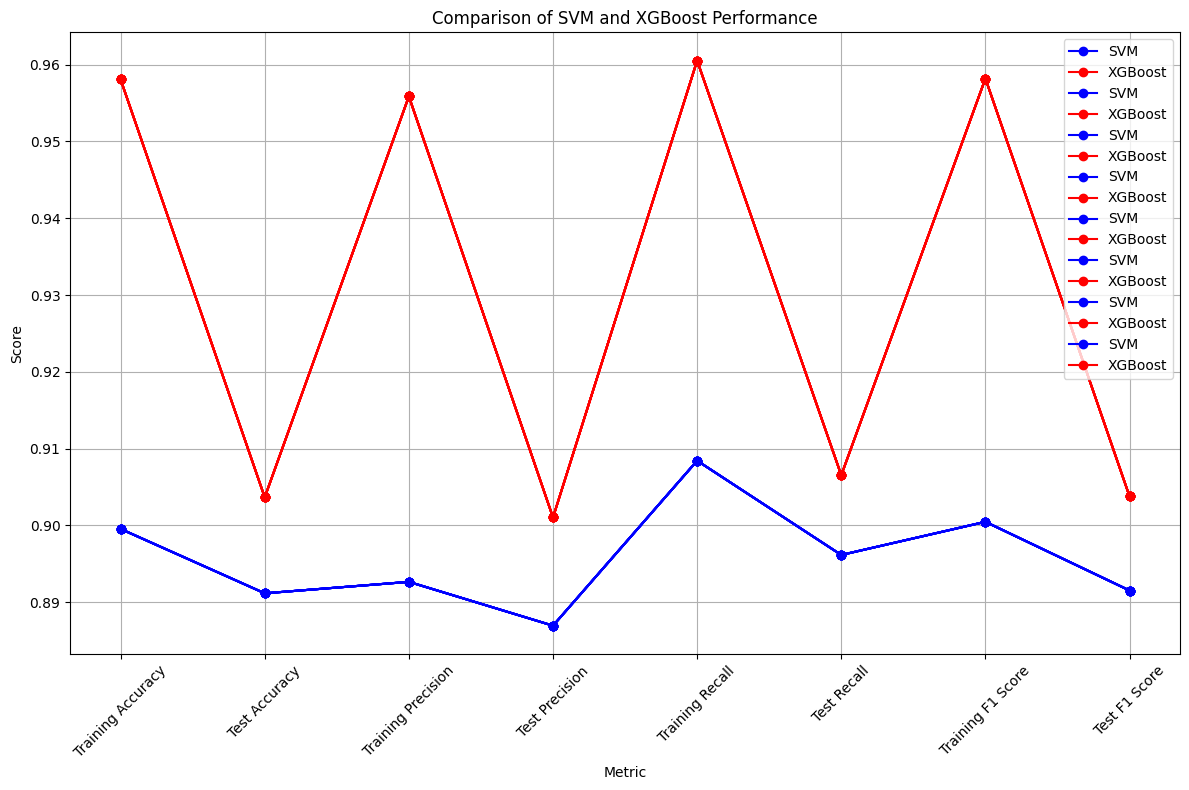

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to get model performance metrics
def get_model_performance(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return {
        "Training Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Training Precision": precision_score(y_train, y_pred_train),
        "Test Precision": precision_score(y_test, y_pred_test),
        "Training Recall": recall_score(y_train, y_pred_train),
        "Test Recall": recall_score(y_test, y_pred_test),
        "Training F1 Score": f1_score(y_train, y_pred_train),
        "Test F1 Score": f1_score(y_test, y_pred_test)
    }

# Get performance metrics for SVM and XGBoost
svm_performance = get_model_performance(svm_model, X_train, X_test, y_train, y_test)
xgb_performance = get_model_performance(xgb_model, X_train, X_test, y_train, y_test)

# Compile the results into a DataFrame
results_df = pd.DataFrame({
    "Metric": ["Training Accuracy", "Test Accuracy", "Training Precision", "Test Precision",
               "Training Recall", "Test Recall", "Training F1 Score", "Test F1 Score"],
    "SVM": [svm_performance["Training Accuracy"], svm_performance["Test Accuracy"],
            svm_performance["Training Precision"], svm_performance["Test Precision"],
            svm_performance["Training Recall"], svm_performance["Test Recall"],
            svm_performance["Training F1 Score"], svm_performance["Test F1 Score"]],
    "XGBoost": [xgb_performance["Training Accuracy"], xgb_performance["Test Accuracy"],
                xgb_performance["Training Precision"], xgb_performance["Test Precision"],
                xgb_performance["Training Recall"], xgb_performance["Test Recall"],
                xgb_performance["Training F1 Score"], xgb_performance["Test F1 Score"]]
})

# Plot the comparison
plt.figure(figsize=(12, 8))

# Plot each metric
for metric in results_df["Metric"]:
    plt.plot(results_df["Metric"], results_df["SVM"], marker='o', label='SVM', color='blue')
    plt.plot(results_df["Metric"], results_df["XGBoost"], marker='o', label='XGBoost', color='red')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of SVM and XGBoost Performance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()